In [1]:
from tree import *

from sklearn.model_selection import KFold
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor as GDBSklearn
import copy

In [2]:
def mse(a, b):
    a = np.array(a)
    b = np.array(b)
    return np.sum((a - b) ** 2)/(a.shape[0])

def get_metrics(X,y,n_folds=2, model=None):
    kf = KFold(n_splits=n_folds, shuffle=True)
    kf.get_n_splits(X)

    y_tests = []
    pred = []
    er_list = []
    models = []
    for train_index, test_index in tqdm_notebook(kf.split(X)):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train,y_train)
        
        predict = model.predict(X_test)
        er_list.append(mse(y_test, predict))
        pred.append(predict)
        y_tests.append(y_test)
        models.append(model)
    
    return er_list, pred, y_tests, models




In [3]:
data = datasets.fetch_california_housing()
X = np.array(data.data)
y = np.array(data.target)

In [7]:
er_XGboosting, pred_b, test_b, models = get_metrics(X,y,5,TreeGradientBoosting(n_models=40, max_depth=3, 
                                                task='xgboost_mse', min_size = 5, no_change_val = 0.05, 
                                                no_change_dev = 1.0, learning_rate = 0.2, init_mse=True,
                                                data_subsample=0.9, learning_rate_dev = 1.0) )

In [12]:
er_sklearn_boosting, _, _, _ = get_metrics(X,y,5, GDBSklearn(n_estimators=40, max_depth=4) )

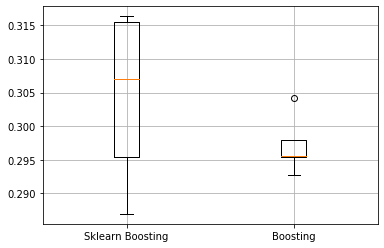

In [13]:
%matplotlib inline
data = [er_sklearn_boosting, er_XGboosting]
fig7, ax7 = plt.subplots()
ax7.set_title('')
ax7.boxplot(data, labels=['Sklearn Boosting', 'Boosting'])
plt.grid()
plt.show()